In [1]:
# @title Import packages
import numpy as np
import matplotlib.pyplot as plt

- Basic setup to simulate trajectories with 3 parameters (drift, bound, starting point) using Euler Mayurama  method
	- Obtain histograms and psychometrics
	- Compare to analytic solutions, explore the error of the approximation with dt
	- Explore dependence of histograms and psychometrics with parameter values
- Add time varying bound, variability in parameters
- Explore race models

- "Optogenetic manipulations"
	- "Sensory neurons" vs "Integrator neurons"
	- Bound "deletion"
        - Other ways?

- History effects
	- Explore updates on starting point and drifts
	- Also post error slowing (increase bounds after errors)

### Basic setup

In [14]:
# @title Functions
def sim_ddm(mu=0.5, theta=1, z=0, sigma=1, n_trials=1000, dt=.001, T=10):
   # time array and prealocate results
   t = np.arange(0, T, dt)
   n_t = t.size
   S = -np.ones((n_trials,2))

   for tr in range(n_trials):
      dW   = np.random.randn(n_t,1) # noise vector
      dx   = mu*dt + sigma*dW*np.sqrt(dt)
      x    = np.cumsum(dx,0)
    
      for ti in range(n_t):
         if x[ti] >= theta:
            S[tr,:] = [1, t[ti]]                                         
            break
         elif x[ti] <= -theta:
            S[tr,:] = [0, t[ti]]         
            break

   # Get the hit and error trials
   hits = np.where(S[:,0]==1)
   errs = np.where(S[:,0]==0)
   return S, hits, errs

In [11]:
# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

In [79]:
# Run DDM simulations for different drifts
n_mu = 21
mu_list = np.linspace(-1, 1, n_mu)
# Preallocate results
S_list = []
hits_list = []
errs_list = []
for mu in mu_list:
    # Simulate trajectories
    S, hits, errs = sim_ddm(mu, theta, z, sigma, n_trials, dt, T)
    S_list.append(S)
    hits_list.append(hits)
    errs_list.append(errs)

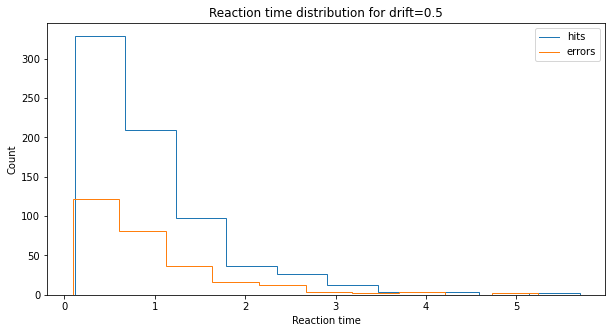

In [81]:
# Plot the reaction time distributions for the hit and error trials, for example mu
mu_i = 15 # example mu

rt_hits_hist, rt_hits_bin_edges = np.histogram(S_list[mu_i][hits_list[mu_i],1])
rt_errs_hist, rt_errs_bin_edges = np.histogram(S_list[mu_i][errs_list[mu_i],1])

plt.figure(figsize=(10,5))
plt.stairs(rt_hits_hist, rt_hits_bin_edges, label='hits')
plt.stairs(rt_errs_hist, rt_errs_bin_edges, label='errors')
plt.xlabel('Reaction time')
plt.ylabel('Count')
plt.title('Reaction time distribution for drift={}'.format(mu_list[mu_i]))
plt.legend(loc='upper right')
plt.show()

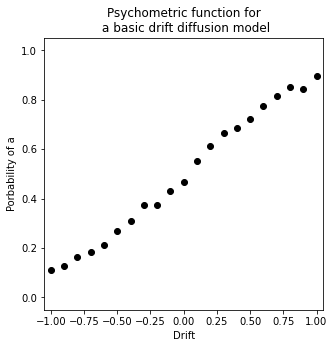

In [88]:
# Plot a psychometric curve
hit_rate = np.zeros((n_mu,))
err_rate = np.zeros((n_mu,))
for i in range(n_mu):
    hit_rate[i] = np.shape(hits_list[i])[1]
    err_rate[i] = np.shape(errs_list[i])[1]
prob_a = np.divide(hit_rate, hit_rate+err_rate) # probability of a

plt.figure(figsize=(5,5))
plt.scatter(mu_list, prob_a, color='k')
plt.xlabel('Drift')
plt.ylabel('Porbability of a')
plt.xlim([np.min(mu_list)-0.05, np.max(mu_list)+0.05])
plt.ylim([0-0.05, 1+0.05])
plt.title('Psychometric function for\n a basic drift diffusion model')
plt.show()

Expand next cell to see solution

In [5]:
# import numpy as np

# # Define DDM parameters
# mu = 0.5 # drift
# theta = 1 # bound
# z = 0 # starting point
# sigma = 1 # noise std

# # Define simulation parameters
# n_trials = 1000
# dt = .001
# T = 10

# # time array and prealocate results
# t = np.arange(0, T, dt)
# n_t = t.size
# S = -np.ones((n_trials,2))

# # Simulate trajectories

# for j in range(n_trials):
    
#     dW   = np.random.randn(n_t,1)
#     dx   = dW*np.sqrt(dt) + mu*dt
#     x    = np.cumsum(dx,0)
    
#     for i in range(n_t):
             
#         if (x[i] >= theta):
#            S[j,:] = [1, t[i]]                                         
#            break
#         elif (x[i] <= -theta):
#            S[j,:] = [0, t[i]]         
#            break
    